In [1]:
import pandas as pd
#import openpyxl
import csv
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import datetime as dt

#PRINT-PREFERENCES :
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

In [2]:
data = pd.read_csv("lego_sets.csv")
data.head(1)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
0,6-12,29.99,2.0,277.0,4.0,Catapult into action and take back the eggs from the Piggy Trike!,75823.0,"Use the staircase catapult to launch Red into the air and race after the piggy, who is speeding ...",Average,Bird Island Egg Heist,4.5,Angry Birds™,4.0,US


In [3]:
data.drop(['prod_desc','prod_long_desc','val_star_rating'],axis=1,inplace=True)
data.head(10)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,set_name,star_rating,theme_name,country
0,6-12,29.99,2.0,277.0,4.0,75823.0,Average,Bird Island Egg Heist,4.5,Angry Birds™,US
1,6-12,19.99,2.0,168.0,4.0,75822.0,Easy,Piggy Plane Attack,5.0,Angry Birds™,US
2,6-12,12.99,11.0,74.0,4.3,75821.0,Easy,Piggy Car Escape,4.3,Angry Birds™,US
3,12+,99.99,23.0,1032.0,3.6,21030.0,Average,United States Capitol Building,4.6,Architecture,US
4,12+,79.99,14.0,744.0,3.2,21035.0,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,US
5,12+,59.99,7.0,597.0,3.7,21039.0,Average,Shanghai,4.9,Architecture,US
6,12+,59.99,37.0,598.0,3.7,21028.0,Average,New York City,4.2,Architecture,US
7,12+,49.99,24.0,780.0,4.4,21029.0,Average,Buckingham Palace,4.7,Architecture,US
8,12+,39.99,23.0,468.0,3.6,21034.0,Average,London,4.7,Architecture,US
9,12+,39.99,11.0,444.0,3.6,21033.0,Average,Chicago,4.8,Architecture,US


In [4]:
dfs = [data] 
for df in dfs:
    print(f'---------------')
    print(df.isna().sum())

---------------
ages                    0
list_price              0
num_reviews          1620
piece_count             0
play_star_rating     1775
prod_id                 0
review_difficulty    2055
set_name                0
star_rating          1620
theme_name              3
country                 0
dtype: int64


In [5]:
data.review_difficulty.isna().sum()

2055

In [6]:
data.review_difficulty.value_counts()

Easy                4236
Average             3765
Very Easy           1139
Challenging         1058
Very Challenging       8
Name: review_difficulty, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_id            12261 non-null  float64
 6   review_difficulty  10206 non-null  object 
 7   set_name           12261 non-null  object 
 8   star_rating        10641 non-null  float64
 9   theme_name         12258 non-null  object 
 10  country            12261 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.0+ MB


In [8]:
data.ages.value_counts()

6-12     1476
7-14     1421
8-14     1180
4-7       957
5-12      911
10+       870
2-5       840
7-12      723
9-14      624
16+       420
8-12      350
4-99      311
12+       298
6-14      233
8+        226
1½-3      213
14+       212
10-21     184
10-16     148
6+        148
1½-5      113
9-16       92
5+         71
11-16      66
9-12       46
12-16      42
5-8        21
9+         21
4+         21
10-14      21
7+          2
Name: ages, dtype: int64

In [9]:
#Converting MSZoning to numerical values
data['ages'] = data['ages'].map({'10-14': '10+','5-8': '5+', '12-16': '12+', '9-12': '9+','11-16': '11+',
                                  '9-16': '9+','1½-5': '1.5+', '10-16': '10+','10-21': '10+','1½-3': '1.5+','6-14': '6+','4-99':'4+',
                                  '8-12': '8+','9-14': '9+','7-12':'7+','2-5': '2+','4-7':'4+','4+':'4+','9+':'9+','5+':'5+','6+':'6+','14+':'14+',
                                 '8+':'8+','16+':'16+','10+':'10+','5-12':'5+','7-14':'7+','8-14':'8+',
                                  '6-12':'6+','12+':'12+','7+':'7+'})


In [10]:
data.ages.value_counts()

7+      2146
6+      1857
8+      1756
4+      1289
10+     1223
5+      1003
2+       840
9+       783
16+      420
12+      340
1.5+     326
14+      212
11+       66
Name: ages, dtype: int64

In [11]:
data.ages.isna().sum()

0

In [12]:
data['num_reviews'] = data['num_reviews'].replace(np.nan, 0)
data['star_rating'] = data['star_rating'].replace(np.nan, 0)
data['play_star_rating'] = data['play_star_rating'].replace(np.nan, 0)
data['theme_name'] =  data['theme_name'].replace(np.nan, "no name")

In [13]:

data['review_difficulty'].fillna(method='ffill', inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   12261 non-null  float64
 5   prod_id            12261 non-null  float64
 6   review_difficulty  12261 non-null  object 
 7   set_name           12261 non-null  object 
 8   star_rating        12261 non-null  float64
 9   theme_name         12261 non-null  object 
 10  country            12261 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.0+ MB


In [19]:
#data['prod_id'].groupby(data.prod_id).agg('country')
#data2 = data.groupby["prod_id"].count()
#data2.head(10)
#df2 =data.groupby('prod_id').count()
data.groupby(['prod_id']).count()
#data.prod_id.value_counts()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,set_name,star_rating,theme_name,country
prod_id,,,,,,,,,,
630.0,21,21,21,21,21,21,21,21,21,21
2304.0,21,21,21,21,21,21,21,21,21,21
7280.0,21,21,21,21,21,21,21,21,21,21
7281.0,21,21,21,21,21,21,21,21,21,21
7499.0,21,21,21,21,21,21,21,21,21,21
7895.0,21,21,21,21,21,21,21,21,21,21
8293.0,21,21,21,21,21,21,21,21,21,21
9843.0,4,4,4,4,4,4,4,4,4,4
10214.0,21,21,21,21,21,21,21,21,21,21


In [16]:
data.head(30)

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_id,review_difficulty,set_name,star_rating,theme_name,country
0,6+,29.99,2.0,277.0,4.0,75823.0,Average,Bird Island Egg Heist,4.5,Angry Birds™,US
1,6+,19.99,2.0,168.0,4.0,75822.0,Easy,Piggy Plane Attack,5.0,Angry Birds™,US
2,6+,12.99,11.0,74.0,4.3,75821.0,Easy,Piggy Car Escape,4.3,Angry Birds™,US
3,12+,99.99,23.0,1032.0,3.6,21030.0,Average,United States Capitol Building,4.6,Architecture,US
4,12+,79.99,14.0,744.0,3.2,21035.0,Challenging,Solomon R. Guggenheim Museum®,4.6,Architecture,US
5,12+,59.99,7.0,597.0,3.7,21039.0,Average,Shanghai,4.9,Architecture,US
6,12+,59.99,37.0,598.0,3.7,21028.0,Average,New York City,4.2,Architecture,US
7,12+,49.99,24.0,780.0,4.4,21029.0,Average,Buckingham Palace,4.7,Architecture,US
8,12+,39.99,23.0,468.0,3.6,21034.0,Average,London,4.7,Architecture,US
9,12+,39.99,11.0,444.0,3.6,21033.0,Average,Chicago,4.8,Architecture,US


ValueError: could not convert string to float: '6+'

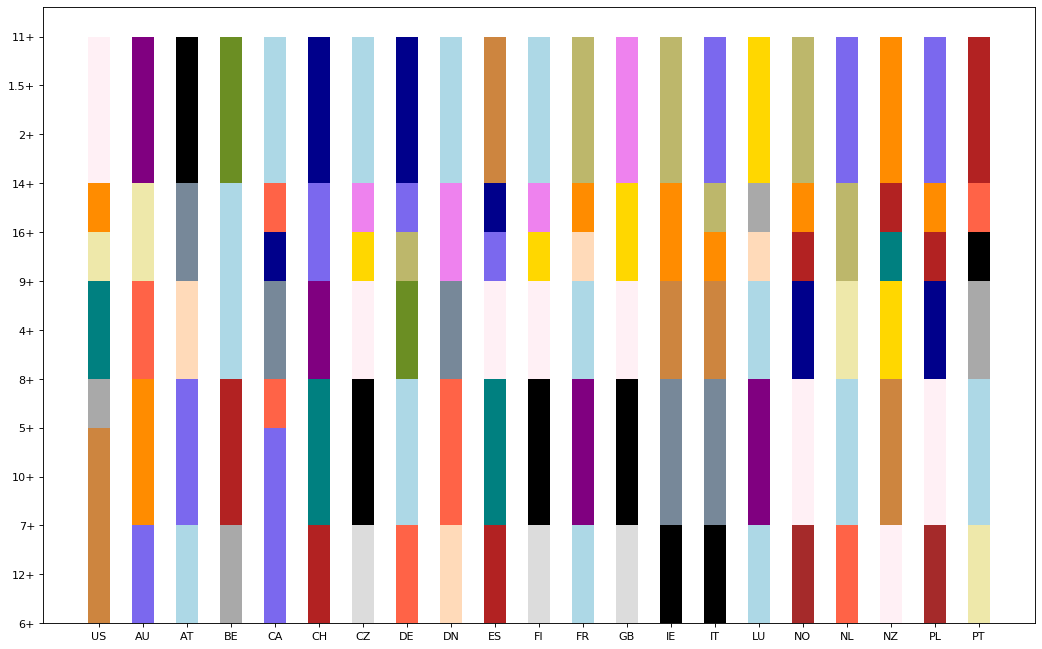

In [220]:
import random



# Prepare Data
data = data.groupby('country').size().reset_index(name='ages')
n = data['country'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['country'], df['ages'], color=c, width=.5)
for i, val in enumerate(df['ages'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['country'], rotation=60, horizontalalignment= 'right')
plt.title("Level of ages by Country", fontsize=22)
plt.ylabel('# Sets')
plt.ylim(0, 45)
plt.show()


In [ ]:
data = data.groupby('country').size().reset_index(name='ages')
n = data['country'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['country'], df['ages'], color=c, width=.5)
for i, val in enumerate(df['ages'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['country'], rotation=60, horizontalalignment= 'right')
plt.title("Level of ages by Country", fontsize=22)
plt.ylabel('# Sets')
plt.ylim(0, 45)
plt.show()